# I. Installation des librairies

Installation des packages à partir de fichier `requirements.txt`

# II. Importation des libairies des librairies

In [1]:
# Manipulation des données
import math
import numpy as np
import pandas as pd

# Visualitation
import matplotlib.pyplot as plt
import seaborn as sns

# Modèles de régression
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Vérification des résultats de sklearn
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import cvxopt

# Répertoire de travail et gestion d'erreur
import os
import warnings

# Fichier python contenant les fonctions
import function_simulation_tools

# III. Définition du repertoire de travail

In [2]:
# Définition du repertoire de travail
chemin = r"C:\Users\lajoi\Documents\1_PROGRAMME DE TRAVAIL\PROGRAMMATION\SimulationRidgeLasso"
mkdir_data = "results_data"
mkdir_graphics = "results_graphiques"

# Création des dossiers
try :

    # Définir le repertoire de travail
    os.chdir(chemin)

    # Création du dossier pour les graphiques
    os.mkdir(mkdir_data)

    # Création du dossier pour les bases de données
    os.mkdir(mkdir_graphics)

except FileExistsError:
    print("L'un des dossiers existe déjà")


L'un des dossiers existe déjà


# IV. Simulation des données

In [3]:
# Noyau de reprdductibilité
random_state_seed = 1980

## IV.1 Simulation Residus

In [8]:
# Taille de la population
PopulationSize = 5000

# Paramètre de la loi Moyenne
LoiMoyenne = 0.007

# Paramètre de la variance
LoiVariance = 1.7

# Fonction pour simuler les residus
Residus = function_simulation_tools.simulation_residus(
    PopulationSize=PopulationSize,
    LoiMoyenne=LoiMoyenne,
    LoiVariance=LoiVariance
)
Residus

array([-1.25070651,  1.53519062,  0.14515761, ..., -0.03069949,
        0.07142035, -0.61661169], shape=(5000,))

## VI.2 Statistiques Descriptives des residus Simulées

In [9]:
# Fonction pour analyser les residus à partir des statistiques descriptivec
function_simulation_tools.statistics_residus(Residus)

,Noms,Valeurs
0,Nombre,5000.000000
1,Moyenne,-0.019362
2,Variance,2.953360
3,Quantile25,-1.191486
4,Quantile50,-0.013761
5,Quantile75,1.131050
6,Min,-5.681268
7,Max,6.125631


## VI.2 Visualisation des residus Simulées


[]

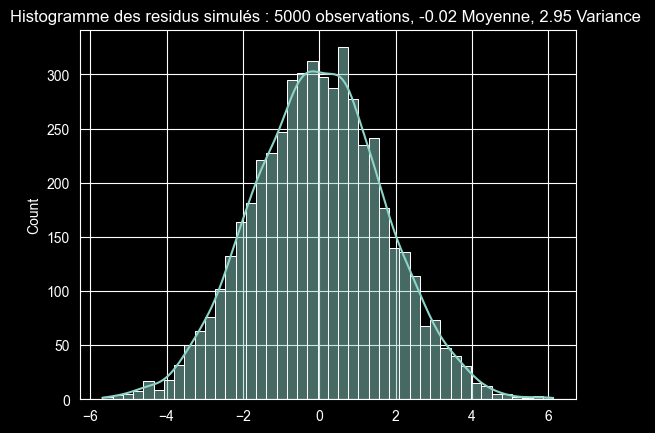

In [10]:
# Fonction pour analyser les residus à partir des visualisations.
function_simulation_tools.visualization_residus(Residus=Residus, Figure='Histogramme')

[]

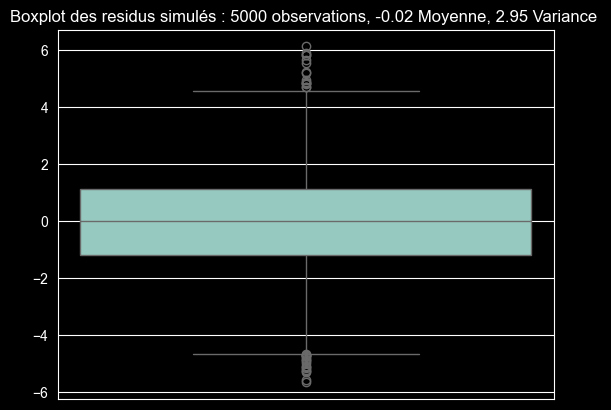

In [11]:
# Fonction pour analyser les residus à partir des visualisations.
function_simulation_tools.visualization_residus(Residus=Residus, Figure='Boxplot')

## IV.3 Simulation des variables d'entrée X et de la variable cible y

In [13]:
# Nombre de Variables d'entrée
FeatureNumber = 8
Coefs_B = [0.69, 1.41, 2.73, -2.84, -3, 3.14, -7, 11]

# Fonction pour simuler les variables d'entrée X et la variable cible y
data_population = function_simulation_tools.simulation_X_y(
    PopulationSize=PopulationSize,
    FeatureNumber=FeatureNumber,
    Coefs_B=Coefs_B,
    Residus=Residus,
    SaveOptionPath=mkdir_data,
    Random_State_Seed=random_state_seed
)
data_population.head(5)

,y,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
0,-2.101035,-1.151514,0.056578,0.625905,1.698989,-1.181865,0.689376,0.532623,0.090816
1,-0.549363,-1.354884,0.090326,0.766721,1.588549,1.453207,0.564089,0.597769,0.719459
2,-5.226830,0.390334,0.050878,0.620461,1.113926,0.650452,-0.178577,0.605067,0.227654
3,-0.848379,-0.823722,0.079268,0.688097,0.679008,0.855681,0.481480,0.406786,0.266656
4,-4.213862,-0.074209,0.045706,0.565449,0.643496,-0.837548,-0.203731,0.536650,-0.083748


## IV.4 Constitution de l'échantillon


In [16]:
# Taille de l'échantillon souhaitée
SampleSize = 500

# Fonction pour constituer un échantillon à partir des données de la population
data_sample = function_simulation_tools.sampling(
    dataframe_population=data_population,
    SampleSize=SampleSize,
    SaveOptionPath=mkdir_data,
    Random_State_Seed=random_state_seed
)
data_sample.head(5)

,y,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
2067,4.753851,-1.870585,0.045980,0.686987,0.416594,-1.419007,-0.389522,0.293503,0.397234
1696,-2.022829,-1.779962,0.025903,0.652414,0.320795,-0.604316,-0.170006,0.265368,0.211235
737,-9.519785,0.289123,0.054873,0.648493,0.443780,-0.182522,-0.324180,0.419014,-0.653921
433,0.320374,-0.400233,0.032780,0.697007,0.741509,0.432104,0.010672,0.484007,0.502209
1730,6.435712,-0.202455,0.048949,0.604350,1.185124,-1.739188,-0.155126,0.413914,0.495281


In [17]:
data_sample.to_csv("results_data/data_sample.csv", index=False)

## IV.5 Séparation de la base de données échantillon


In [18]:
# Base d'apprentissage et d'évaluation à l'aide de la validation croissée
data_train, data_test = train_test_split(data_sample, test_size=0.25, random_state=random_state_seed)

In [19]:
data_train.to_csv('results_data/data_train.csv', index = False)
data_test.to_csv('results_data/data_test.csv', index = False)

## IV.6 Choix de la base de données pour l'étude


In [20]:
# Bases de données probables
data_names = ['data_population', 'data_sample', 'data_train', 'data_test']

# Base de dnnées de l'étude
data_final = pd.read_csv(f"{mkdir_data}/{data_names[2]}.csv")

# Aperçu de la base de données
data_final.head(5)

,y,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
0,-4.401563,0.144652,0.064369,0.726188,1.280242,-1.893269,-0.339977,0.103840,-0.353408
1,2.849529,0.097177,0.055257,0.567558,-0.152872,-1.034398,0.253904,0.745530,0.372038
2,-6.374590,-1.237885,0.076894,0.654534,0.560576,1.306852,-0.133487,0.345575,0.041904
3,-4.769509,0.452064,0.058022,0.762500,0.912121,-0.630288,-0.587448,0.723166,0.046757
4,-5.331594,-0.624945,0.065408,0.744419,1.583297,0.372263,0.461920,0.117109,-0.178900


In [21]:
# Variable à prédire
Target = np.array(data_sample['y']).reshape(-1,1)

# Variables prédictives
Predictors = data_sample.drop('y', axis=1)

# Variables prédictives standardisées : Ridge et Lasso
# scaler = StandardScaler()
# Predictors_scaled_array = scaler.fit_transform(Predictors)
# Predictors_scaled = pd.DataFrame(Predictors_scaled_array, columns=Predictors.columns)

# V. Régression

## 3.1 Estimation

In [22]:
# Estimation du modèle de Régression par MCO avec constante
RegMCO = LinearRegression(fit_intercept=True)
RegMCO.fit(Predictors, Target)

LinearRegression()

## 3.2 Résultats

In [23]:
# Résultats du modèle de régression par MCO
RegMCO.coef_

array([[ 0.57016442, -1.46633078,  5.06240181, -2.83083302, -2.81871711,
         2.904088  , -6.43516226, 10.67484791]])

In [24]:
# Estimation du modèle de Régression par MCO avec constante
RegressionsModels = OLS(Target, sm.add_constant(Predictors))
regMC0_sm = RegressionsModels.fit()

# Résultats du modèle de régression par MCO
regMC0_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     629.5
Date:                Wed, 11 Feb 2026   Prob (F-statistic):          1.45e-252
Time:                        20:43:40   Log-Likelihood:                -939.88
No. Observations:                 500   AIC:                             1898.
Df Residuals:                     491   BIC:                             1936.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6664      0.612     -2.723      0.007      -2.869      -0.464
X_1            0.5702      0.089      6.399      0.000       0.395       0.745
X_2           -1.4663      3.652     -0.402      0.688      -8.642       5.709
X_3            5.0624      0.838      6.041      0.000       3.416       6.709
X_4           -2.8308      0.085    -33.344      0.000      -2.998      -2.664
X_5           -2.8187      0.074    -37.874      0.000      -2.965      -2.672
X_6            2.9041      0.143     20.250      0.000       2.622       3.186
X_7           -6.4352      0.407    -15.802      0.000      -7.235      -5.635
X_8           10.6748      0.259     41.267      0.000      10.167      11.183
==============================================================================
Omnibus:                        1.091   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                0.891
Skew:                          -0.058   Prob(JB):                        0.641
Kurtosis:                       3.171   Cond. No.                         81.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. Régression Régularisée RIDGE

## 4.1 Coefficient de Pénalisation

In [25]:
# Définition du coefficient de pénalisaton
CoefPenalisation = 0.15

## 4.2 Estimation

In [26]:
# Estimation du modèle par Régression Régularisée : Ridge
RegRidge = Ridge(alpha=CoefPenalisation, fit_intercept=True)
RegRidge.fit(Predictors, Target)

Ridge(alpha=0.15)

## 4.3 Résultats


In [27]:
RegRidge.coef_

array([ 0.56941667, -0.80642656,  4.84135191, -2.83129078, -2.81766562,
        2.8997647 , -6.3769401 , 10.62862097])

## 4.4 Vérification

In [28]:
# Estimation de la régression Ridge
regRidge_sm = RegressionsModels.fit_regularized(
    method='sqrt_lasso',
    alpha=CoefPenalisation,
    L1_wt=0
)

regRidge_sm_regularized = RegressionsModels.fit(start_params=regRidge_sm.params)
regRidge_sm_regularized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     629.5
Date:                Wed, 11 Feb 2026   Prob (F-statistic):          1.45e-252
Time:                        20:43:57   Log-Likelihood:                -939.88
No. Observations:                 500   AIC:                             1898.
Df Residuals:                     491   BIC:                             1936.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6664      0.612     -2.723      0.007      -2.869      -0.464
X_1            0.5702      0.089      6.399      0.000       0.395       0.745
X_2           -1.4663      3.652     -0.402      0.688      -8.642       5.709
X_3            5.0624      0.838      6.041      0.000       3.416       6.709
X_4           -2.8308      0.085    -33.344      0.000      -2.998      -2.664
X_5           -2.8187      0.074    -37.874      0.000      -2.965      -2.672
X_6            2.9041      0.143     20.250      0.000       2.622       3.186
X_7           -6.4352      0.407    -15.802      0.000      -7.235      -5.635
X_8           10.6748      0.259     41.267      0.000      10.167      11.183
==============================================================================
Omnibus:                        1.091   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                0.891
Skew:                          -0.058   Prob(JB):                        0.641
Kurtosis:                       3.171   Cond. No.                         81.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. Régression Régularisée LASSO


## 5.1 Estimation

In [29]:
# Estimation du modèle par Régression Régularisée : Lasso
RegLasso = Lasso(alpha=CoefPenalisation, fit_intercept=True)
RegLasso.fit(Predictors, Target)

Lasso(alpha=0.15)

## 5.2 Résultats


In [30]:
RegLasso.coef_

array([ 0.26941603, -0.        ,  0.        , -2.72683396, -2.62503019,
        2.25249464, -1.46365684,  8.64578058])

# 6. Analyse des Prédictions des Modèles de Régression

In [31]:
# Création du dataframe
data_predictions = pd.DataFrame({"Obs_True":Target.ravel()})

In [32]:
# Prédiction des modèles de régression
RegMCO_y_s_pred = RegMCO.predict(Predictors)
RegRidge_y_s_pred = RegRidge.predict(Predictors)
RegLasso_y_s_pred = RegLasso.predict(Predictors)

In [33]:
# Matrice des prédictions
data_predictions['Obs_Pred_Mco'] = RegMCO_y_s_pred
data_predictions['Obs_Pred_Ridge'] = RegRidge_y_s_pred
data_predictions['Obs_Pred_Lasso'] = RegLasso_y_s_pred

In [34]:
# Aperçu de la base de données
data_predictions.head(5)

,Obs_True,Obs_Pred_Mco,Obs_Pred_Ridge,Obs_Pred_Lasso
0,4.753851,4.718328,4.695580,4.332699
1,-2.022829,1.432261,1.410750,1.407291
2,-9.519785,-9.659293,-9.612374,-7.529954
3,0.320374,0.546087,0.517620,0.513824
4,6.435712,4.926137,4.923144,4.726379


In [35]:
# Sauvegarder de la base de données de prédiction
data_predictions.to_csv(f"{mkdir_data}/data_predictions.csv", index=False)

# Visualisation des prédictions

[]

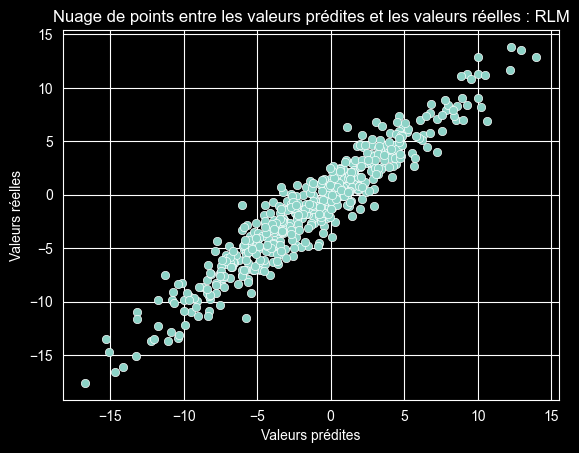

In [36]:
# Nugae de points entre les valeurs réelles et les valeurs prédites du modèle de MCO
sns.scatterplot(data=data_predictions, x='Obs_Pred_Mco', y='Obs_True')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Nuage de points entre les valeurs prédites et les valeurs réelles : RLM')
plt.plot()


[]

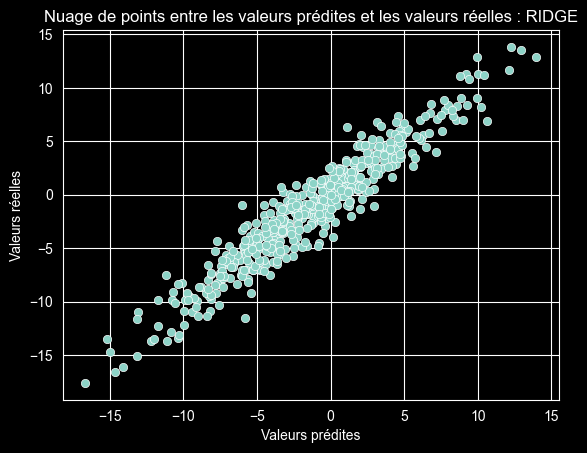

In [37]:
# Nugae de points entre les valeurs réelles et les valeurs prédites du modèle de MCO
sns.scatterplot(data=data_predictions, x='Obs_Pred_Ridge', y='Obs_True')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Nuage de points entre les valeurs prédites et les valeurs réelles : RIDGE')
plt.plot()


[]

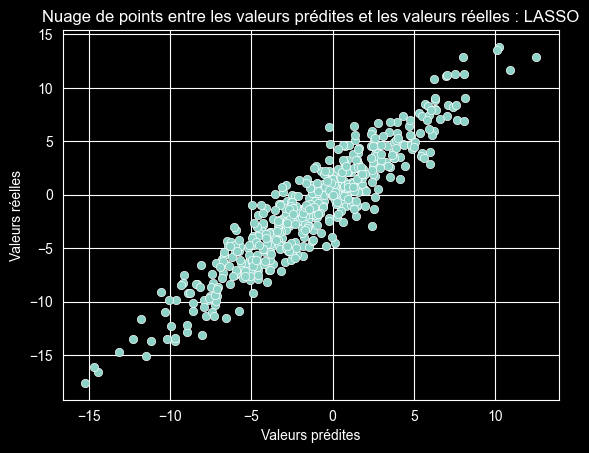

In [38]:
# Nugae de points entre les valeurs réelles et les valeurs prédites du modèle de MCO
sns.scatterplot(data=data_predictions, x='Obs_Pred_Lasso', y='Obs_True')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Nuage de points entre les valeurs prédites et les valeurs réelles : LASSO')
plt.plot()


# Etapes Suivantes :

1. Installation des packages à partir du terminal
2. Création d'une fonction permettant de simuler des residus et d'effectuer des statistiques descriptives
3. Implémebntation de B_ridge lorsque Lambda grandi et visualiisation (GridResearchCV avec CV=1 ou chercher des alternatives)
4. Implémentation de B_lasso lorsque  Lambda grandi et visualisation (GridResearchCV avec CV=1 ou chercher des alternatives)
5. Courbes de niveau des estimateurs
6.